# <a href="https://thetahat.ru/courses/bm-2024-aut">Cтатистика ФБМФ</a>
## Свойства оценок

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import scipy.stats as sps
import seaborn as sns
sns.set(font_scale=1.5)

### 1. Состоятельность оценок

Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $Exp(\theta)$. Как известно из теории, оценка $\widehat{\theta} = 1/\overline{X}$ является *состоятельной* и *асимтотически нормальной* оценкой параметра $\theta$ с асимптотической дисперсией $\theta^2$. В этой задаче вам необходимо визуализировать данные свойства.


Зададим параметры эксперимента


In [17]:
theta = 2  # истинное значение параметра
sample_size = 300  # размер выборок
sample_count = 500  # количество выборок
n_range = (np.arange(sample_size) + 1)  # размеры подвыборок
print(n_range)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

Сгенерируем множество выборок из распределения $Exp(\theta)$ (количество выборок - `sample_count`, размер каждой выборки - `sample_size`)

In [18]:
# генерируем множество выборок,
# параметр theta является обратным к параметру масштаба
samples = np.random.exponential(scale = 1/theta, size=(sample_count, sample_size))

Вычислим оценки в зависимости от размера выборки, усредняем по последней оси

In [19]:

estimation = []
for j in range(500):
  estimation.append([])
  for i in n_range:
    estimation[j].append(1/(np.mean((samples[j][:i]),axis=-1)))


Визуализируем для каждой выборки все оценки в зависимости от размера выборки.

Что можно сказать о состоятельности данной оценки?

In [20]:
def est_plot(estimation, sample_count, sample_size, left=None, right=None, xlim = sample_size ):
    '''
    estimation -- массив оценок от размера выборки
    sample_count -- количество генерируемых выборок
    sample_size -- размер каждой выборки
    left, rigth -- границы доверительного интеравала, нужны будут далее
    xlim = область по x
    '''

    plt.figure(figsize=(15, 7))
    for i in range(sample_count):
        plt.plot(np.arange(sample_size) + 1, estimation[i], color='blue', alpha=0.05)
    if type(left) and type(right) is np.ndarray:

        plt.plot(np.arange(sample_size) + 1, left, color='black')
        plt.plot(np.arange(sample_size) + 1, right, color='black')
        labels = [r'$\hat{\theta}$', r'$\theta$',
                  'Границы доверительного интервала']
        handels = [Line2D([0], [0], color='blue', lw=2),
                   Line2D([0], [0], color='red', lw=2),
                   Line2D([0], [0], color='black', lw=2)]

    else:
        labels = [r'$\hat{\theta}$', r'$\theta$']
        handels = [Line2D([0], [0], color='blue', lw=2),
                   Line2D([0], [0], color='red', lw=2),]

    plt.hlines(theta, 0 ,sample_size, color='red')
    plt.title('Поведение оценки для разных реализаций')
    plt.xlabel('Размер выборки')
    plt.ylim((0, 5))
    plt.legend(handels, labels)
    plt.xlim((0, xlim));

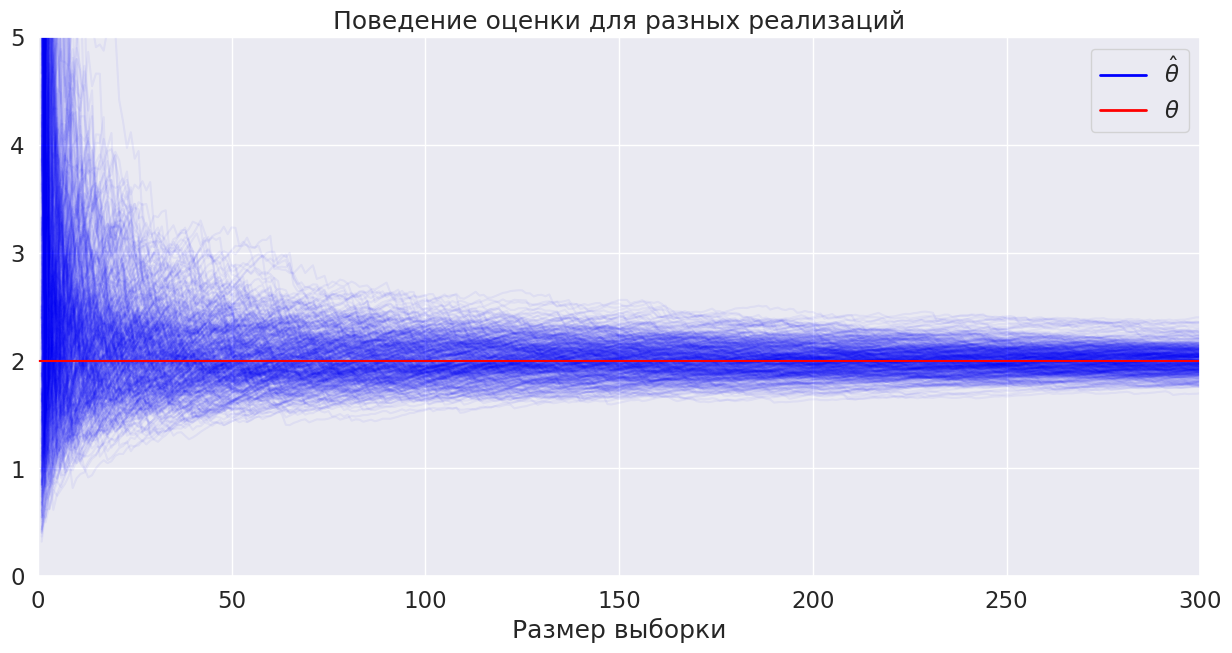

In [21]:
theta = 2
#estimation_arrays = [est[0] for est in estimation]
est_plot(estimation, sample_count, sample_size, theta, xlim = max(n_range))


**Ответ:** Состоятельная, так как при большом размере выборки она сходится.

### 2. Асимптотическая нормальность оценки

Добавим доверительный интервал для нашей оценки.

Свойство *асимптотической нормальности* говорит о том, что с вероятностью около 0.95 при больших размерах выборки значение оценки отклоняется от истинного значения параметра не более чем на $2\theta\left/\sqrt{n}\right.$. Добавте интервалы в функцию, чтобы на рисунок добавился доверительный интервал.

In [22]:
right = theta + 2*theta / np.sqrt(np.arange(1, sample_size+1))
left = theta - 2*theta / np.sqrt(np.arange(1, sample_size+1))

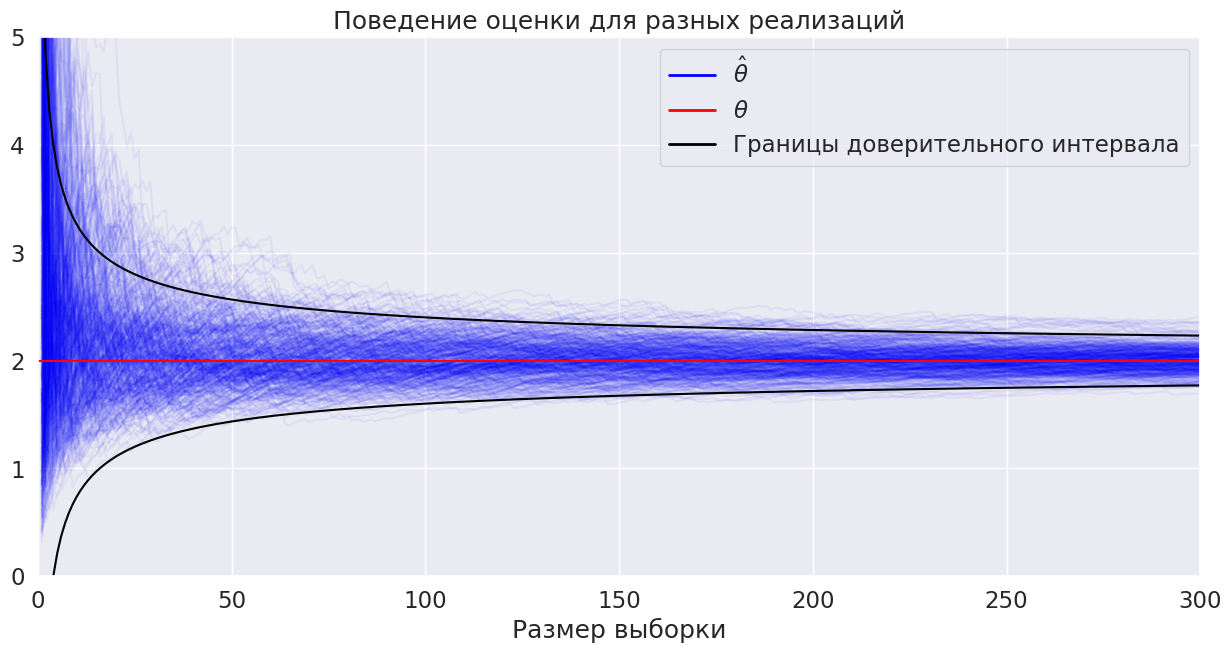

In [24]:
est_plot(estimation, sample_count, sample_size, left, right)

**Вывод:** при больших значениях выборки почти все значения находятся внутри доверительного интерввала, это доказывает асимптотическую нормальность.

Приблизим этот график в области малых размеров выборки (до 50). Какой вывод вы можете сделать?

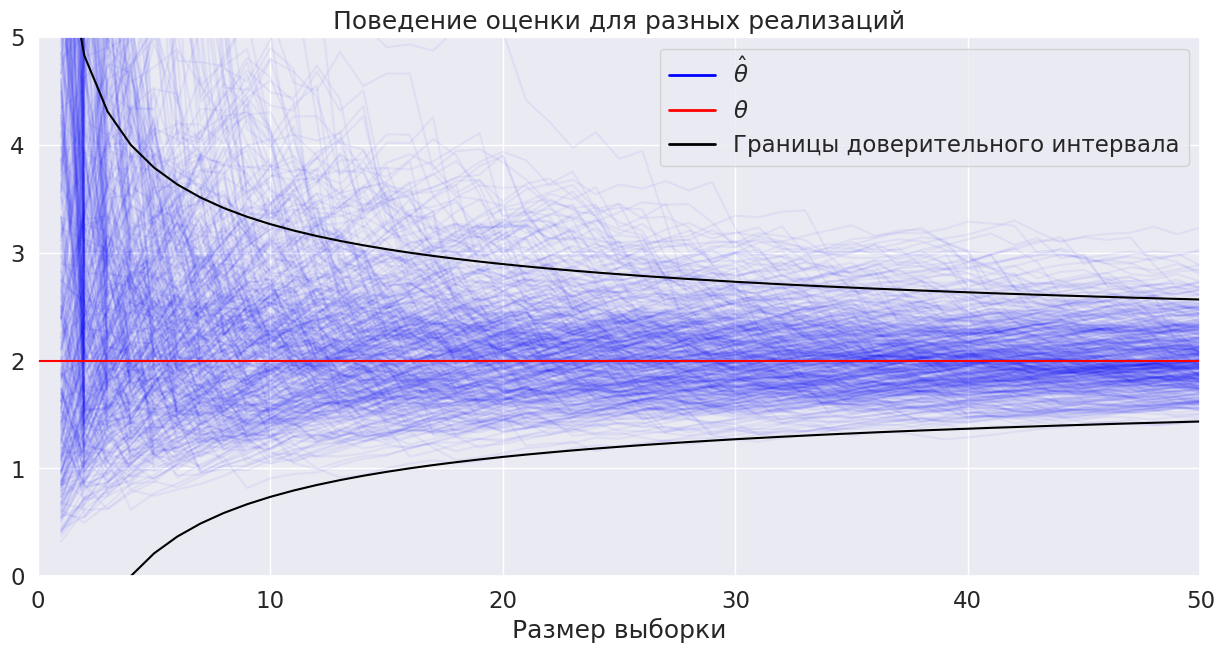

In [26]:
est_plot(estimation, sample_count, sample_size, left, right, xlim = 50)

**Вывод:** при маленьких значениях выборки значения выходят за пределы интервала, это показывает то, что все наши определения и доказательства верны при устремлении n к бесконечности.